<a href="https://colab.research.google.com/github/Teerapatt6/E-commerce-Price-Analytics/blob/main/notebooks/model/sarima_dsde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('./s24_price_in_thb.csv', parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'])
df

,price_inr,date,price_thb
0,79999.0,2024-01-18 14:24:00,35199.56
1,79999.0,2024-01-20 10:08:12,35199.56
2,79999.0,2024-01-24 12:52:25,35199.56
3,79999.0,2024-01-28 18:52:00,35199.56
4,79999.0,2024-01-29 02:48:00,35199.56
...,...,...,...
485,46900.0,2025-10-25 00:25:35,20636.00
486,47200.0,2025-10-26 01:03:40,20768.00
487,47940.0,2025-10-27 20:18:41,21093.60
488,47897.0,2025-10-28 19:49:03,21074.68


In [7]:
!pip install matplotlib

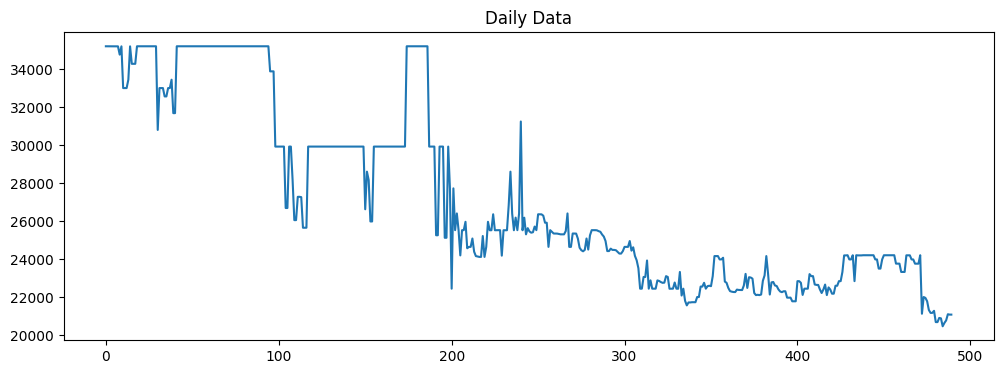

In [8]:
import matplotlib.pyplot as plt
df['price_thb'].plot(figsize=(12,4))
plt.title("Daily Data")
plt.show()

In [9]:
!pip install statsmodels

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['price_thb'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.6749894483026628
p-value: 0.44404253762207446


In [11]:
df_diff = df['price_thb'].diff().dropna()

In [12]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [13]:
p, d, q = 2, 1, 0
P, D, Q, s = 1, 1, 1, 180

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
model = SARIMAX(train['price_thb'],
                order=(p,d,q),
                seasonal_order=(P,D,Q,s),
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                             price_thb   No. Observations:                  460
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 180)   Log Likelihood                -778.292
Date:                               Thu, 20 Nov 2025   AIC                           1566.583
Time:                                       16:57:40   BIC                           1579.457
Sample:                                            0   HQIC                          1571.788
                                               - 460                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2140      0.115     -1.855      0.064      -0.440       0.012
ar.L2         -0.1736      0.102     -1.704      0.088      -0.373       0.026
ar.S.L180     -0.4807      0.066     -7.332      0.000      -0.609      -0.352
ma.S.L180     -0.9946      0.121     -8.240      0.000      -1.231      -0.758
sigma2      3.937e+05   3.08e-07   1.28e+12      0.000    3.94e+05    3.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                67.97
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             0.85
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.92e+26. Standard errors may be unstable.
"""

In [22]:
pred = model_fit.predict(start=test.index[0], end=test.index[-1])

In [23]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
y_test = test['price_thb']
y_pred = pred

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 1824.5131105428218
RMSE: 2080.828961048563
MAPE: 8.328674132310681


In [25]:
pred

,predicted_mean
460,23383.091772
461,23515.142682
462,23574.393573
463,23523.839897
464,21280.557679
465,21281.218823
466,23504.736207
467,23484.967860
468,22235.078136
469,20713.474714


In [26]:
future = model_fit.forecast(30)
future

,predicted_mean
460,23383.091772
461,23515.142682
462,23574.393573
463,23523.839897
464,21280.557679
465,21281.218823
466,23504.736207
467,23484.967860
468,22235.078136
469,20713.474714


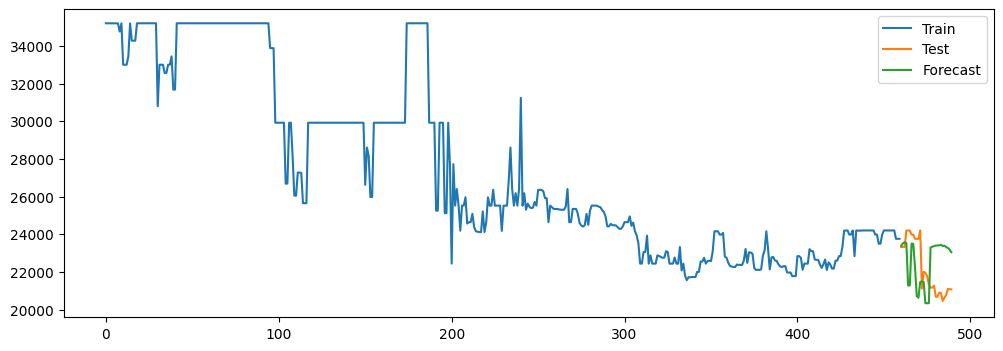

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train.index, train['price_thb'], label='Train')
plt.plot(test.index, test['price_thb'], label='Test')
plt.plot(future.index, future, label='Forecast')
plt.legend()
plt.show()